In [1]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,confusion_matrix
from matplotlib import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### There were four variants of the datasets out of which we chose “ bank-additional-full.csv” which consists of 41188 data points with 21 independent variables out of which 10 are numeric features and 10 are categorical features. 'y' is target variable.

In [2]:
bank=pd.read_csv('bank-additional-full.csv',sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
type(bank)

pandas.core.frame.DataFrame

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
print(bank.duration.head()) # duration column is not visible in table
bank.duration.shape

0    261
1    149
2    226
3    151
4    307
Name: duration, dtype: int64


(41188,)

In [6]:
bank.shape

(41188, 21)

In [7]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
bank.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

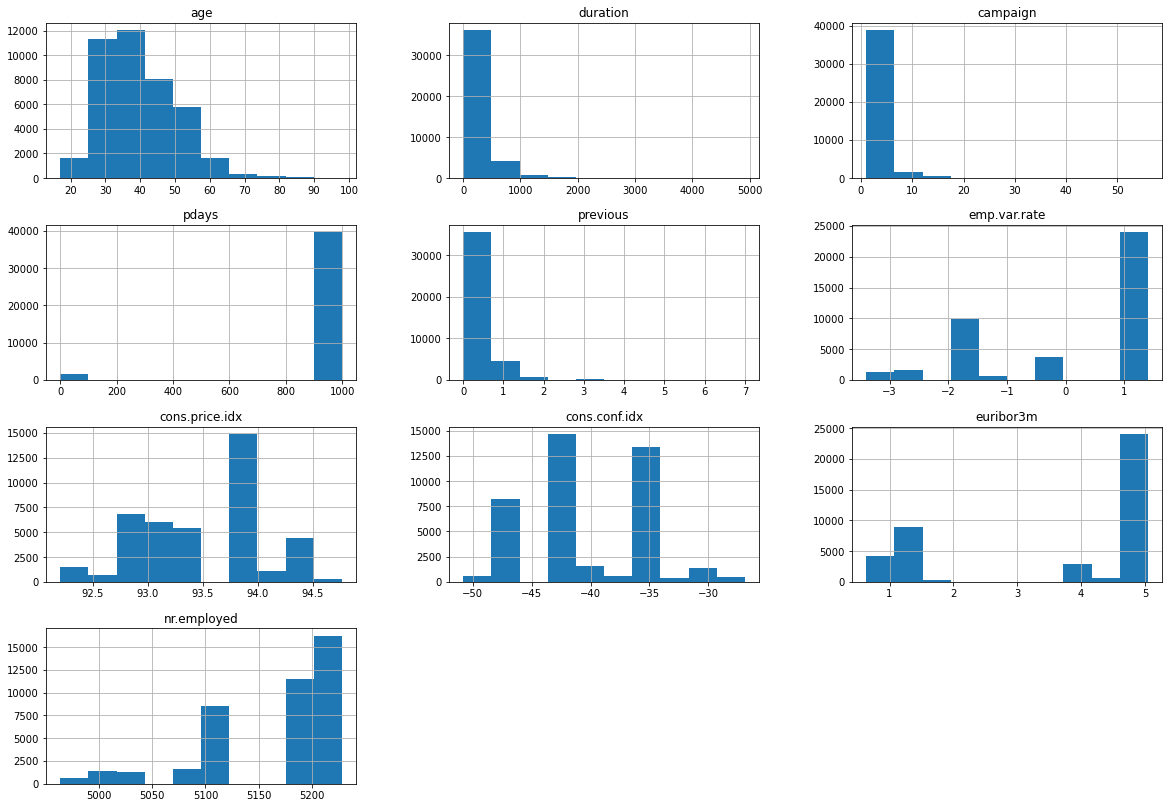

In [10]:
rcParams['figure.figsize'] = 20, 14
bank.hist()

<AxesSubplot:>

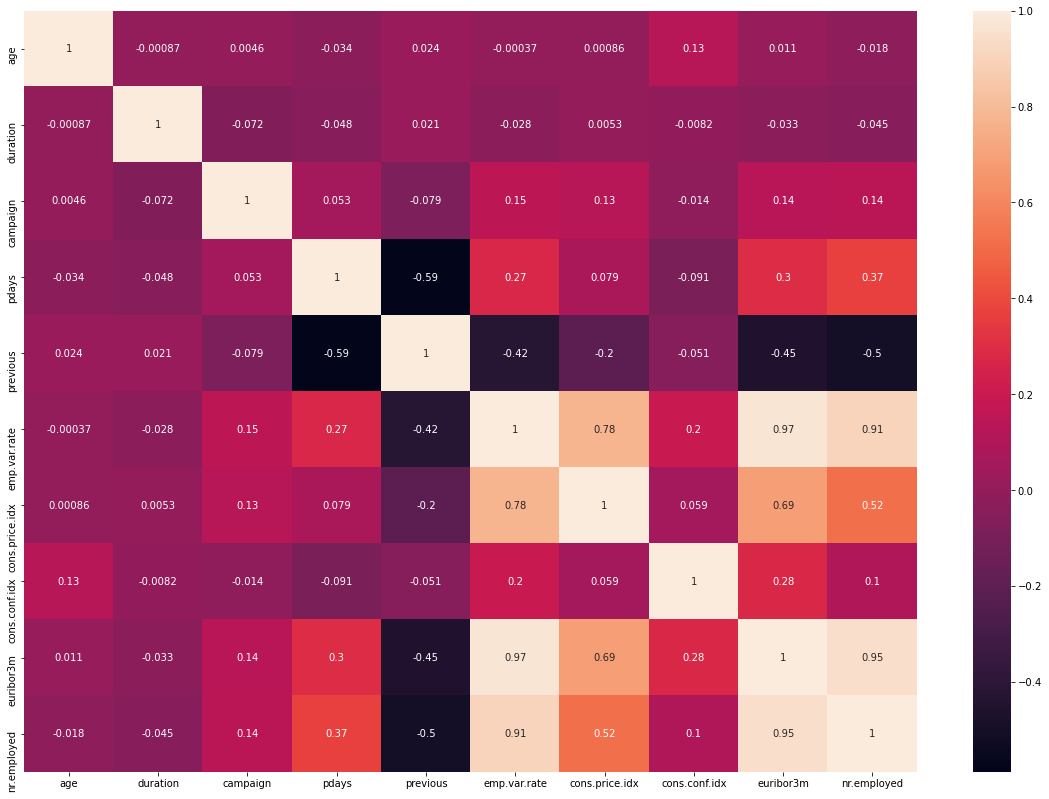

In [11]:
#this heatmap shows graphical representation of correlation matrix.
sb.heatmap(bank.corr(),annot=True)

## Exploratory Data Analysis (EDA)

In [12]:
bank.apply(lambda x: len(x.unique()))

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

### Analysis of target

In [13]:
# Target variable description 
bank.y.describe()

count     41188
unique        2
top          no
freq      36548
Name: y, dtype: object

no     36548
yes     4640
Name: y, dtype: int64


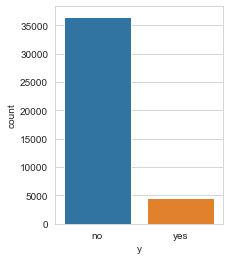

In [14]:
rcParams['figure.figsize'] = 3,4
sb.set_style('whitegrid')
y = bank["y"]
sns.countplot(y)
target_bank = y.value_counts()
print(target_bank)

### Dataset is imbalanced due to 88.75 : 11. 26 ratio.

## Analysis of Features :

#### Analysis of 'age' feature

In [15]:
# 1st variable is "age"
bank["age"].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

Text(0.5, 1.0, 'Age Distribution')

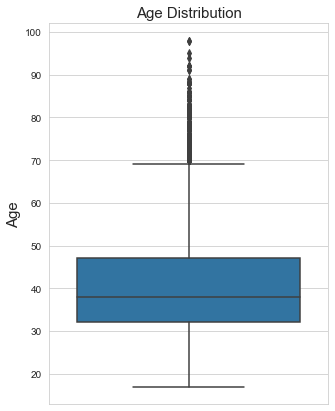

In [16]:
rcParams['figure.figsize'] = 5,7
sns.boxplot(y = 'age', data = bank, orient = 'v')
plt.ylabel("Age", fontsize=15)
plt.title('Age Distribution', fontsize=15)

In [17]:
print('1º Quartile: ', bank['age'].quantile(q = 0.25))
print('2º Quartile: ', bank['age'].quantile(q = 0.50))
print('3º Quartile: ', bank['age'].quantile(q = 0.75))
print('4º Quartile: ', bank['age'].quantile(q = 1.00))
print('Ages above: ', bank['age'].quantile(q = 0.75) + 
                      1.5*(bank['age'].quantile(q = 0.75) - bank['age'].quantile(q = 0.25)), 'are outliers')
print('Numerber of outliers: ', bank[bank['age'] > 70.5]['age'].count())
print('Number of clients: ', len(bank))
#Outliers in %
print('Outliers are:', round(bank[bank['age'] > 70.5]['age'].count()*100/len(bank),2), '%')

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above:  69.5 are outliers
Numerber of outliers:  422
Number of clients:  41188
Outliers are: 1.02 %


#### Analysis of 'Job' feature 

Text(0.5, 1.0, 'Job Distribution')

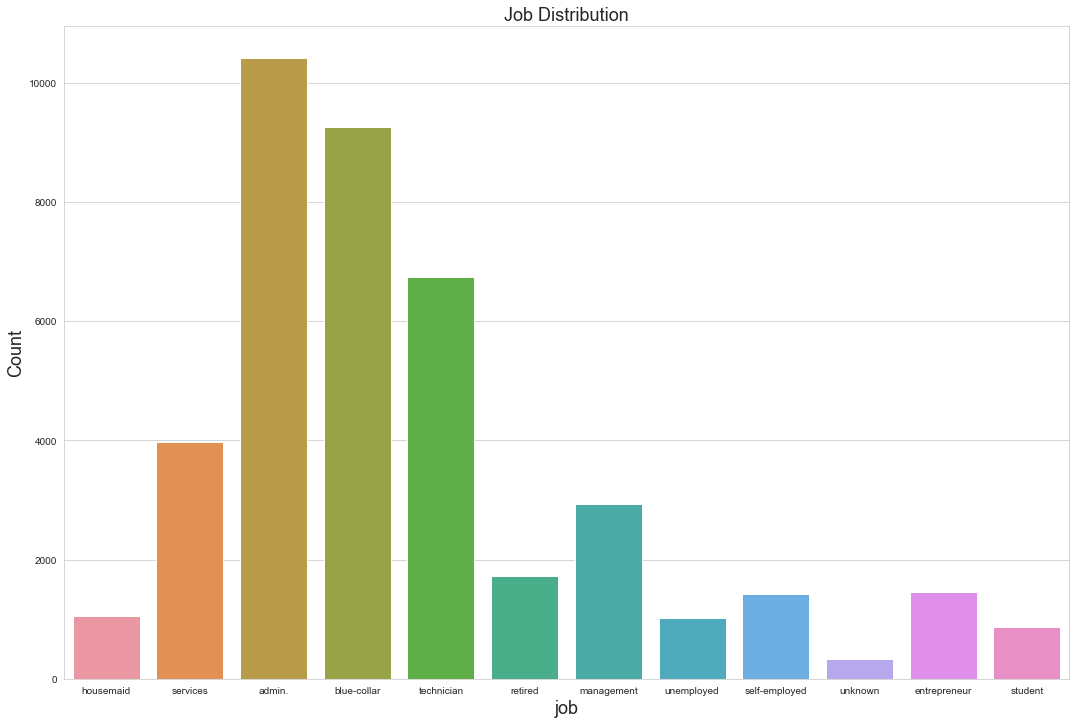

In [18]:
plt.figure(figsize = (18,12))
sns.countplot(x = 'job',data = bank)
plt.xlabel("job", fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Job Distribution', fontsize=18)

#### The count of 'admin' is higher than the other .Also the count for 'blue-collar' is noticeable.

### Analysis of 'marital' feature

Text(0.5, 1.0, 'Marital Distribution')

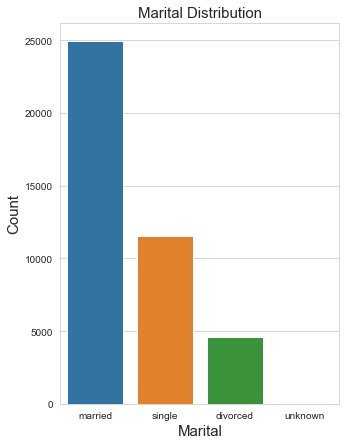

In [19]:
sns.countplot(x = 'marital',data = bank)
plt.xlabel("Marital", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Marital Distribution', fontsize=15)

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


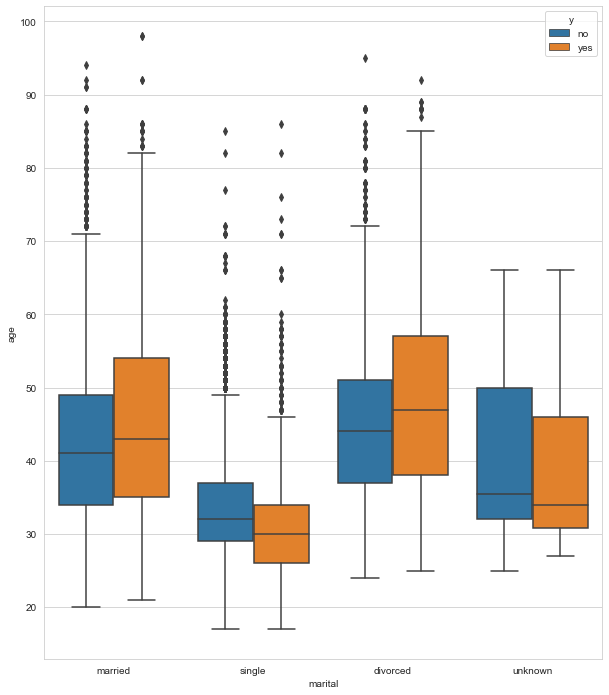

In [20]:
plt.figure(figsize = (10,12))
sns.boxplot(x='marital',y='age',hue='y',data=bank)
marital_count = bank.marital.value_counts()
print(marital_count)

#### Here we can see the married people are more subscribing a term deposit.Married people are more ,we can see here clearly.

#### Analysis of Education feature

Text(0.5, 1.0, 'Education Distribution')

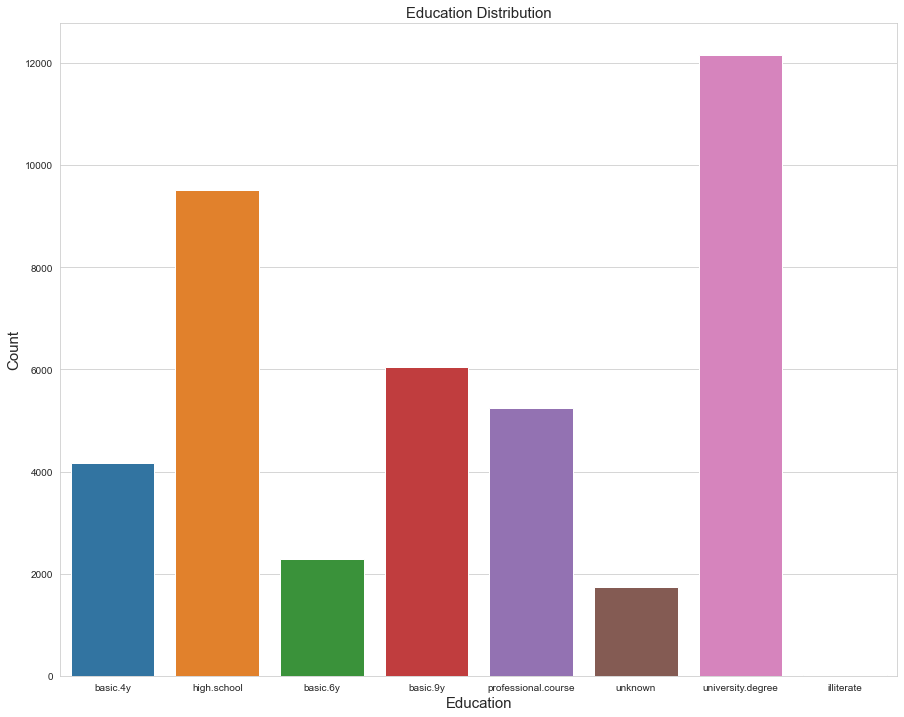

In [21]:
plt.figure(figsize = (15,12))
sns.countplot(x = 'education',data = bank)
plt.xlabel("Education", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Education Distribution', fontsize=15)

#### The clients having university degree are more .And the clients having unknown education and illiterate are less.


university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


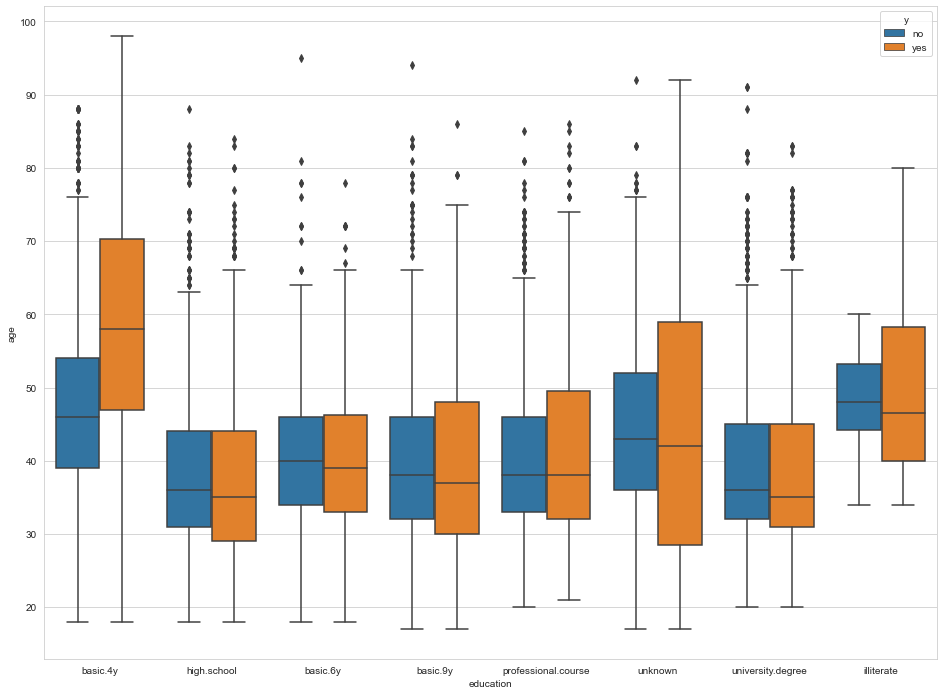

In [22]:
plt.figure(figsize = (16,12))
sns.boxplot(x='education',y='age',hue='y',data=bank)
education_count = bank.education.value_counts()
print(education_count)

#### Analysis of default feature

Text(0.5, 1.0, 'Default Distribution')

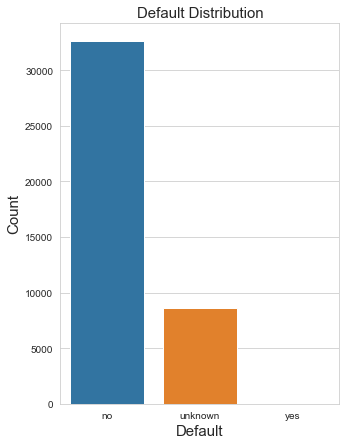

In [23]:
sns.countplot(x = 'default',data = bank)
plt.xlabel("Default", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Default Distribution', fontsize=15)

no         32588
unknown     8597
yes            3
Name: default, dtype: int64


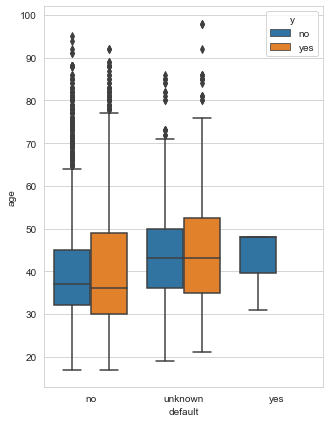

In [24]:
sns.boxplot(x='default',y='age',hue='y',data=bank)
default_count = bank.default.value_counts()
print(default_count)

#### The clients having by default credit(only 3) are less than those who don't have by default credit.

#### Analysis of housing feature

Text(0.5, 1.0, 'Housing Distribution')

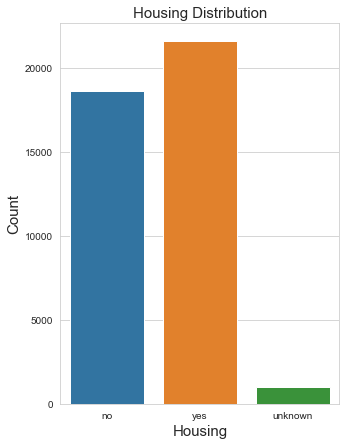

In [25]:
sns.countplot(x = 'housing',data = bank)
plt.xlabel("Housing", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Housing Distribution', fontsize=15)


#### The clients having Housing loan are more than the clients who don't have Housing Loan.

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


<AxesSubplot:xlabel='housing', ylabel='age'>

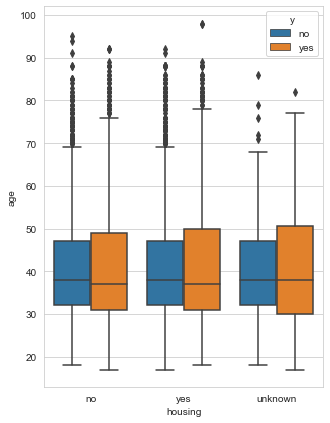

In [26]:
housing_count = bank.housing.value_counts()
print(housing_count)
sns.boxplot(x='housing',y='age',hue='y',data=bank)

#### Analysis of loan feature

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


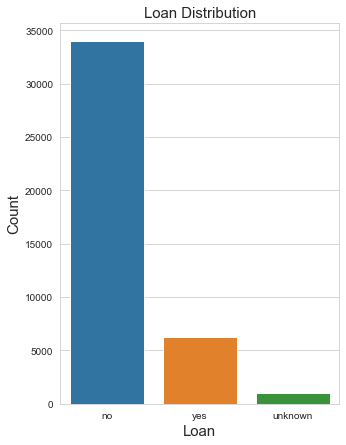

In [27]:
sns.countplot(x = 'loan',data = bank)
plt.xlabel("Loan", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Loan Distribution', fontsize=15)
loan_count = bank.loan.value_counts()
print(loan_count)

#### The clients having Personal loan are less than clients don't have Personal loan.

<AxesSubplot:xlabel='loan', ylabel='age'>

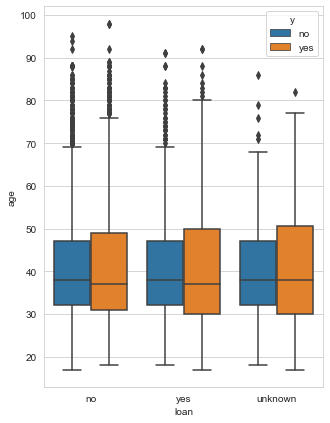

In [28]:
sns.boxplot(x='loan',y='age',hue='y',data=bank)

#### Analysis of contact feature

Text(0.5, 1.0, 'Contact Distribution')

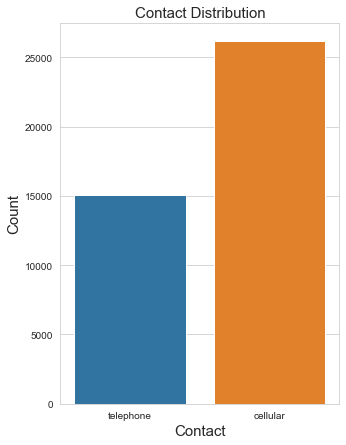

In [29]:
sns.countplot(x = 'contact',data = bank)
plt.xlabel("Contact", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Contact Distribution', fontsize=15)

In [30]:
contact_count = bank.contact.value_counts()
print(contact_count)

cellular     26144
telephone    15044
Name: contact, dtype: int64


#### The count of a clients who can be contacted by Cellular is high that of the telephone.

#### Analysis of month Feature

Text(0.5, 1.0, 'Monthly Distribution')

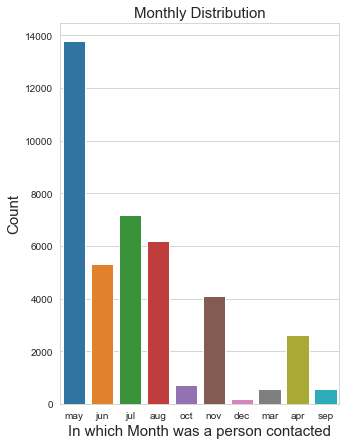

In [31]:
sns.countplot(x = 'month',data = bank)
plt.xlabel("In which Month was a person contacted", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Monthly Distribution', fontsize=15)

#### The no. of contacts performed in May month is highest than the other months.But it is not sure as the year is not mentioned in the dataset.

#### Analysis of day feature

Text(0.5, 1.0, 'Monthly Distribution')

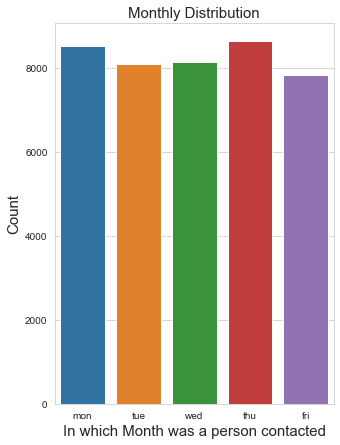

In [32]:
sns.countplot(x = 'day_of_week',data = bank)
plt.xlabel("In which Month was a person contacted", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Monthly Distribution', fontsize=15)

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


<AxesSubplot:xlabel='day_of_week', ylabel='age'>

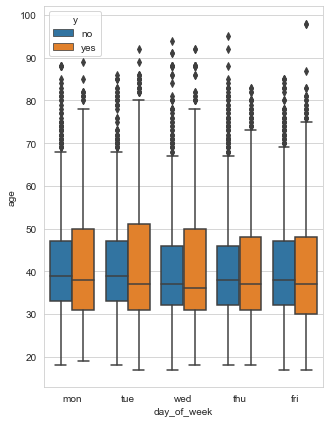

In [33]:
day_count = bank.day_of_week.value_counts()
print(day_count)
sns.boxplot(x='day_of_week',y='age',hue='y',data=bank)

#### Analysis of duration of call feature

Text(0.5, 1.0, 'Duration distribution')

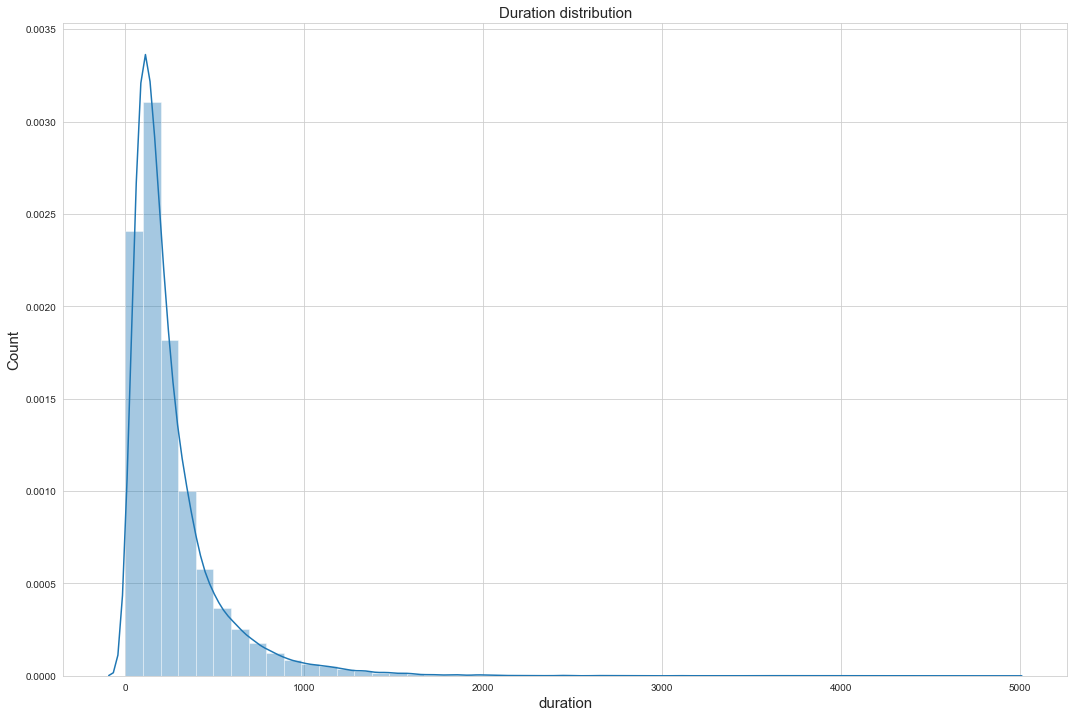

In [34]:
plt.figure(figsize = (18,12))
sns.distplot(bank['duration'])
plt.xlabel("duration", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Duration distribution', fontsize=15)

In [35]:
#Outliers in duration:
print('1º Quartile: ', bank['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank['duration'].quantile(q = 0.75))
print('4º Quartile: ', bank['duration'].quantile(q = 1.00))
print('Duration above: ', bank['duration'].quantile(q = 0.75) + 
                      1.5*(bank['duration'].quantile(q = 0.75) - bank['duration'].quantile(q = 0.25)), 'are outliers')
print('Numerber of outliers: ', bank[bank['duration'] > 643.0]['duration'].count())
print('Number of clients: ', len(bank))
#Outliers in %
print('Outliers are:', round(bank[bank['duration'] > 643.0]['duration'].count()*100/len(bank),2), '%')

1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
Duration above:  644.5 are outliers
Numerber of outliers:  2973
Number of clients:  41188
Outliers are: 7.22 %


#### Here we can see the percentage of the outliers is less.But count is high means 644 count is not less .

In [36]:
# Look, if the call duration is iqual to 0, then is obviously that this person didn't subscribed, 
# THIS LINES NEED TO BE DELETED LATER 
print(bank[bank['duration'] == 0]['duration'].count())
bank[(bank['duration'] == 0)]

4


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


In [37]:
bank = bank.drop(labels=[6251,23031,28063,33015], axis=0)
bank.shape

(41184, 21)

#### Analysis Of Compaign feature 

Text(0.5, 1.0, 'Campaign Distribution')

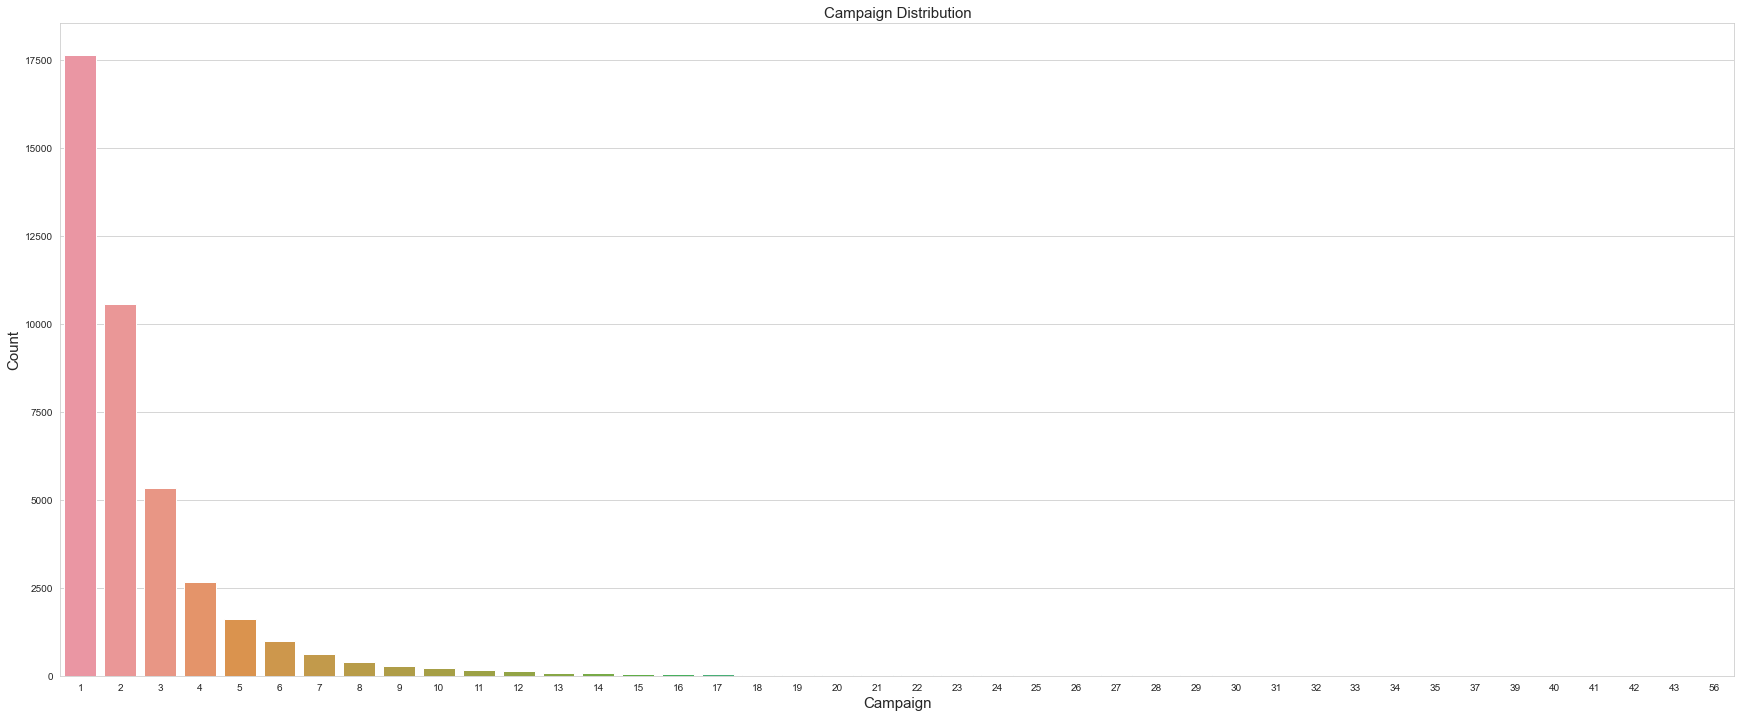

In [38]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'campaign', data = bank)
plt.xlabel("Campaign", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Campaign Distribution', fontsize=15)

Text(0.5, 1.0, 'Campaign Distribution')

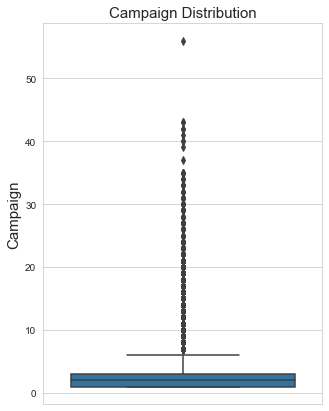

In [39]:
sns.boxplot(y = 'campaign', data = bank, orient = 'v')
plt.ylabel("Campaign", fontsize=15)
plt.title('Campaign Distribution', fontsize=15)

Text(0.5, 1.0, 'Campaign distribution')

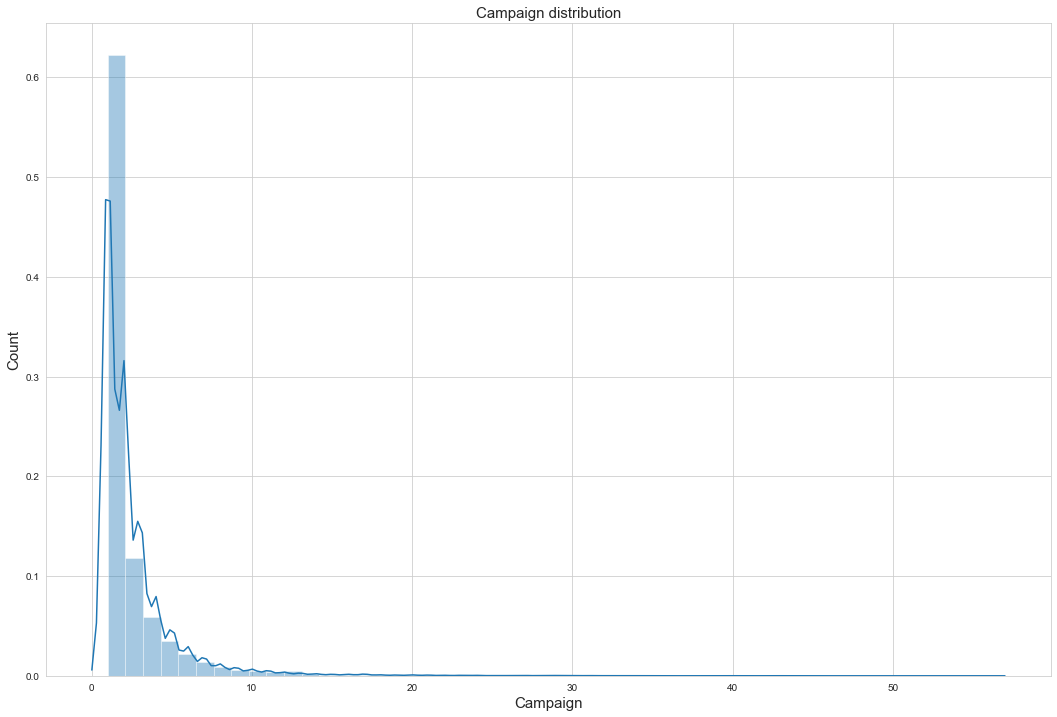

In [40]:
plt.figure(figsize = (18,12))
sns.distplot(bank['campaign'])
plt.xlabel("Campaign", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Campaign distribution', fontsize=15)

In [41]:
#Outliers in compaign feature
print('1º Quartile: ', bank['campaign'].quantile(q = 0.25))
print('2º Quartile: ', bank['campaign'].quantile(q = 0.50))
print('3º Quartile: ', bank['campaign'].quantile(q = 0.75))
print('4º Quartile: ', bank['campaign'].quantile(q = 1.00))
print('Campaign above: ',bank['campaign'].quantile(q = 0.75) + 
                      1.5*(bank['campaign'].quantile(q = 0.75) - bank['campaign'].quantile(q = 0.25)), 'are outliers')
print('Numerber of outliers: ', bank[bank['campaign'] > 6.0]['campaign'].count())
print('Number of clients: ', len(bank))
#Outliers in %
print('Outliers are:', round(bank[bank['campaign'] > 6.0]['campaign'].count()*100/len(bank),2), '%')

1º Quartile:  1.0
2º Quartile:  2.0
3º Quartile:  3.0
4º Quartile:  56.0
Campaign above:  6.0 are outliers
Numerber of outliers:  2405
Number of clients:  41184
Outliers are: 5.84 %


#### The percentage of presence of outlier is less as we can see.So we can fit the model with or without this attribute.

#### Analysis of pdays feature

Text(0.5, 1.0, 'pdays Distribution')

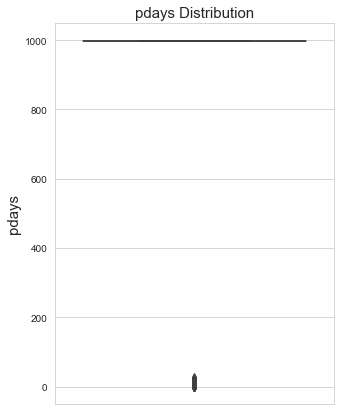

In [42]:
sns.boxplot(y = 'pdays', data = bank, orient = 'v')
plt.ylabel("pdays", fontsize=15)
plt.title('pdays Distribution', fontsize=15)

#### Analysis of previous feature

Text(0.5, 1.0, 'Previous')

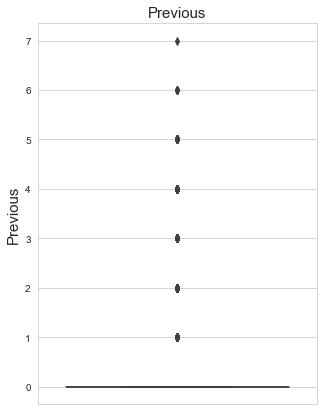

In [43]:
sns.boxplot(y= 'previous', data = bank, orient = 'v')
plt.ylabel("Previous", fontsize=15)
plt.title('Previous', fontsize=15)

#### Analysis of poutcome feature

nonexistent    35559
failure         4252
success         1373
Name: poutcome, dtype: int64


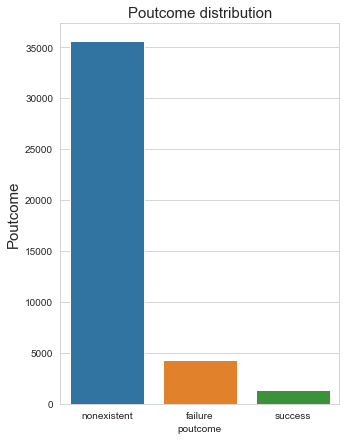

In [44]:
sns.countplot(x = 'poutcome', data = bank, orient = 'v')
plt.ylabel("Poutcome", fontsize=15)
plt.title('Poutcome distribution', fontsize=15)
poutcome_count = bank.poutcome.value_counts()
print(poutcome_count)

#### The success of the previous marketing campaign is not noticeable as we can see in graph.

In [45]:
bank = bank.replace({'y': {'yes': 1,'no': 0}})
bank.y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

### Dealing with Duplicate values:

In [46]:
bank_dup=bank[bank.duplicated(keep="last")]
bank_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0


#### As we can see there are some duplicate rows in our datasets, we will remove the duplicates before moving forward.

In [47]:
#41188-12 =41176 rows
bank_new=bank.drop_duplicates()
bank_new.shape

(41172, 21)

### Dealing with Missing values

#### in our dataset there are no missing values
#refer In[4]

### convert catogarical variables in dummy variable
As our dataset has 10 categorical features we will need to encode these features into a numerical representation to apply the machine learning models.

In [48]:
Dataset=pd.get_dummies(bank_new,columns=["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"],drop_first=True)

In [49]:
Dataset

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0


In [50]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41172 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41172 non-null  int64  
 1   duration                       41172 non-null  int64  
 2   campaign                       41172 non-null  int64  
 3   pdays                          41172 non-null  int64  
 4   previous                       41172 non-null  int64  
 5   emp.var.rate                   41172 non-null  float64
 6   cons.price.idx                 41172 non-null  float64
 7   cons.conf.idx                  41172 non-null  float64
 8   euribor3m                      41172 non-null  float64
 9   nr.employed                    41172 non-null  float64
 10  y                              41172 non-null  int64  
 11  job_blue-collar                41172 non-null  uint8  
 12  job_entrepreneur               41172 non-null 

In [51]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
             'euribor3m', 'nr.employed']
Dataset[columns_to_scale] = standardScaler.fit_transform(Dataset[columns_to_scale])

### Train Test Split 

In [52]:
X=Dataset.drop(columns=['y'])
Y=Dataset.y

In [53]:
#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)

In [54]:
from collections import Counter
from sklearn.datasets import make_classification
# summarize class distribution
print("Before undersampling: ", Counter(y_train))

Before undersampling:  Counter({0: 25577, 1: 3243})


In [55]:
!pip install imblearn

### UNDERSAMPLING STRATEGY

###  Random undersampling reduces the number of majority class randomly down to the desired ratio against the minority class. This is probably the easiest way to undersample and can actually yield good results if there are a lot of the majority class instances that are close to each other.

In [56]:
#define undersampling strategy
from imblearn.under_sampling import RandomUnderSampler 
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
# summarize class distribution
print("After undersampling: ", Counter(y_train_under))

After undersampling:  Counter({0: 3243, 1: 3243})


ROC AUC score for undersampled data SVC:  0.8818691018306096
Accuracy score: 0.8397830310880829
              precision    recall  f1-score   support

           0       0.99      0.83      0.90     10956
           1       0.41      0.94      0.57      1396

    accuracy                           0.84     12352
   macro avg       0.70      0.88      0.74     12352
weighted avg       0.92      0.84      0.86     12352



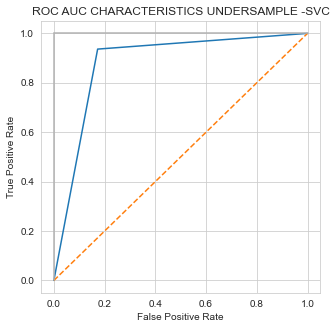

ROC AUC score for undersampled data RANDOM FOREST:  0.8893992223125374
Accuracy score: 0.8531411917098446
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     10956
           1       0.43      0.94      0.59      1396

    accuracy                           0.85     12352
   macro avg       0.71      0.89      0.75     12352
weighted avg       0.93      0.85      0.87     12352



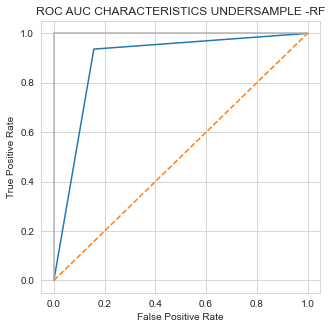

[22:30:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROC AUC score for undersampled data XGB :  0.8845662671524859
Accuracy score: 0.8595369170984456
              precision    recall  f1-score   support

           0       0.99      0.85      0.91     10956
           1       0.44      0.92      0.60      1396

    accuracy                           0.86     12352
   macro avg       0.71      0.88      0.76     12352
weighted avg       0.93      0.86      0.88     12352



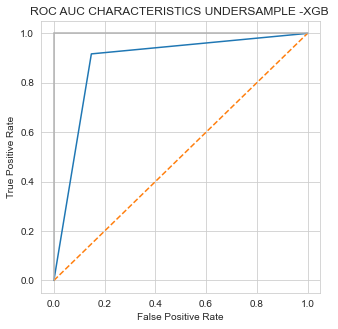

ROC AUC score for undersampled data LR :  0.8714608368352282
Accuracy score: 0.8612370466321243
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     10956
           1       0.44      0.88      0.59      1396

    accuracy                           0.86     12352
   macro avg       0.71      0.87      0.75     12352
weighted avg       0.92      0.86      0.88     12352



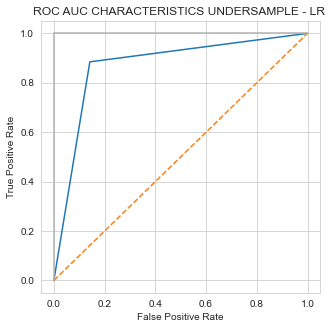

ROC AUC score for undersampled data KNN :  0.8608412550959241
Accuracy score: 0.8435071243523317
              precision    recall  f1-score   support

           0       0.98      0.84      0.90     10956
           1       0.41      0.88      0.56      1396

    accuracy                           0.84     12352
   macro avg       0.70      0.86      0.73     12352
weighted avg       0.92      0.84      0.87     12352



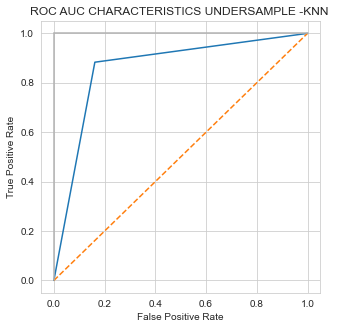

ROC AUC score for undersampled data DC :  0.8447376377089499
Accuracy score: 0.8409974093264249
              precision    recall  f1-score   support

           0       0.98      0.84      0.90     10956
           1       0.40      0.85      0.55      1396

    accuracy                           0.84     12352
   macro avg       0.69      0.84      0.73     12352
weighted avg       0.91      0.84      0.86     12352



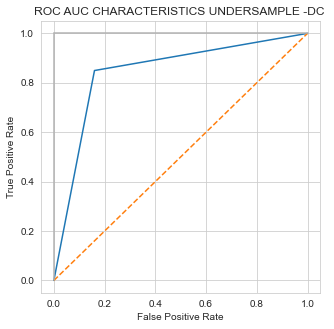

In [57]:
# import SVM libraries 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score

model=SVC()
clf_under = model.fit(X_train_under, y_train_under)
pred_under = clf_under.predict(X_test)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, pred_under)
print("ROC AUC score for undersampled data SVC: ", roc_auc_score(y_test, pred_under))
print('Accuracy score:',accuracy_score(y_test, pred_under))
print(classification_report(y_test,pred_under))

# Ploting ROC curve for SVC Model :
plt.subplots(1, figsize=(5,5))
plt.title('ROC AUC CHARACTERISTICS UNDERSAMPLE -SVC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


model1=RandomForestClassifier()
clf_under1 = model1.fit(X_train_under, y_train_under)
pred_under1 = clf_under1.predict(X_test)
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, pred_under1)
print("ROC AUC score for undersampled data RANDOM FOREST: ", roc_auc_score(y_test, pred_under1))
print('Accuracy score:',accuracy_score(y_test, pred_under1))
print(classification_report(y_test,pred_under1))

# Ploting ROC curve for RANDOM FOREST :
plt.subplots(1, figsize=(5,5))
plt.title('ROC AUC CHARACTERISTICS UNDERSAMPLE -RF')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


model2=XGBClassifier()
clf_under2 = model2.fit(X_train_under, y_train_under)
pred_under2 = clf_under2.predict(X_test)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, pred_under2)
print("ROC AUC score for undersampled data XGB : ", roc_auc_score(y_test, pred_under2))
print('Accuracy score:',accuracy_score(y_test, pred_under2))
print(classification_report(y_test,pred_under2))

# Ploting ROC curve for XG BOOST CLASSIFIER :
plt.subplots(1, figsize=(5,5))
plt.title('ROC AUC CHARACTERISTICS UNDERSAMPLE -XGB ')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


model3=LogisticRegression()
clf_under3 = model3.fit(X_train_under, y_train_under)
pred_under3 = clf_under3.predict(X_test)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, pred_under3)
print("ROC AUC score for undersampled data LR : ", roc_auc_score(y_test, pred_under3))
print('Accuracy score:',accuracy_score(y_test, pred_under3))
print(classification_report(y_test,pred_under3))

# Ploting ROC curve for lR :
plt.subplots(1, figsize=(5,5))
plt.title('ROC AUC CHARACTERISTICS UNDERSAMPLE - LR ')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


model4=KNeighborsClassifier()
clf_under4 = model4.fit(X_train_under, y_train_under)
pred_under4 = clf_under4.predict(X_test)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, pred_under4)
print("ROC AUC score for undersampled data KNN : ", roc_auc_score(y_test, pred_under4))
print('Accuracy score:',accuracy_score(y_test, pred_under4))
print(classification_report(y_test,pred_under4))

# Ploting ROC curve for KNN :
plt.subplots(1, figsize=(5,5))
plt.title('ROC AUC CHARACTERISTICS UNDERSAMPLE -KNN ')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


model5=DecisionTreeClassifier()
clf_under5 = model5.fit(X_train_under, y_train_under)
pred_under5= clf_under5.predict(X_test)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, pred_under5)
print("ROC AUC score for undersampled data DC : ", roc_auc_score(y_test, pred_under5))
print('Accuracy score:',accuracy_score(y_test, pred_under5))
print(classification_report(y_test,pred_under5))

# Ploting ROC curve for DC :
plt.subplots(1, figsize=(5,5))
plt.title('ROC AUC CHARACTERISTICS UNDERSAMPLE -DC ')
plt.plot(false_positive_rate5, true_positive_rate5)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### OVERSAMPLING STRATEGY

### For over-sampling techniques, SMOTE (Synthetic Minority Oversampling Technique) is considered as one of the most popular and influential data sampling algorithms in ML and data mining.

Before oversampling:  Counter({0: 25577, 1: 3243})
After oversampling:  Counter({0: 25577, 1: 25577})
ROC AUC score for oversampled SMOTE data SVC:  0.8297817474639375
Accuracy score: 0.8848769430051814
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     10956
           1       0.49      0.76      0.60      1396

    accuracy                           0.88     12352
   macro avg       0.73      0.83      0.77     12352
weighted avg       0.91      0.88      0.90     12352



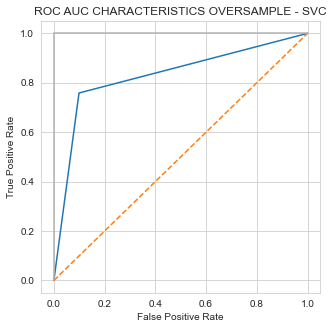

ROC AUC score for oversampled SMOTE data RANDOM FOREST:  0.7980371603632556
Accuracy score: 0.9067357512953368
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     10956
           1       0.58      0.66      0.61      1396

    accuracy                           0.91     12352
   macro avg       0.77      0.80      0.78     12352
weighted avg       0.91      0.91      0.91     12352



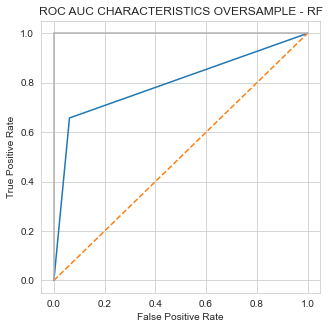

[22:35:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROC AUC score for oversampled SMOTE data XGB:  0.7776771320761032
Accuracy score: 0.9066547927461139
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     10956
           1       0.58      0.61      0.60      1396

    accuracy                           0.91     12352
   macro avg       0.77      0.78      0.77     12352
weighted avg       0.91      0.91      0.91     12352



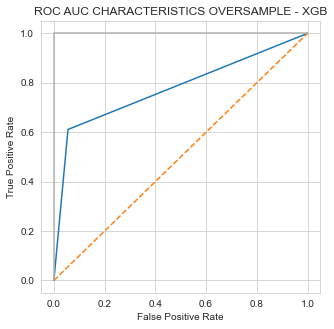

ROC AUC score for oversampled SMOTE data DC:  0.7627774709151794
Accuracy score: 0.8857674870466321
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     10956
           1       0.50      0.60      0.54      1396

    accuracy                           0.89     12352
   macro avg       0.72      0.76      0.74     12352
weighted avg       0.90      0.89      0.89     12352



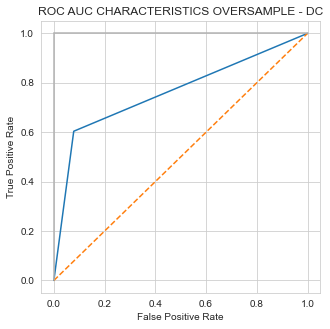

ROC AUC score for oversampled SMOTE data LR:  0.796717215305609
Accuracy score: 0.8827720207253886
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     10956
           1       0.49      0.69      0.57      1396

    accuracy                           0.88     12352
   macro avg       0.72      0.80      0.75     12352
weighted avg       0.90      0.88      0.89     12352



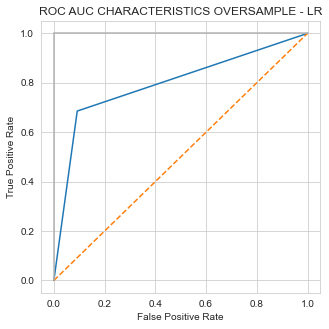

ROC AUC score for oversampled SMOTE data AND KNN:  0.8447503219441977
Accuracy score: 0.849336139896373
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     10956
           1       0.42      0.84      0.56      1396

    accuracy                           0.85     12352
   macro avg       0.70      0.84      0.73     12352
weighted avg       0.91      0.85      0.87     12352



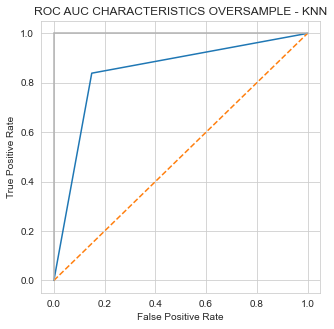

In [58]:
from imblearn.over_sampling import SMOTE
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

model=SVC()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, pred_SMOTE)
print("ROC AUC score for oversampled SMOTE data SVC: ", roc_auc_score(y_test, pred_SMOTE))
print('Accuracy score:',accuracy_score(y_test, pred_SMOTE))
print(classification_report(y_test,pred_SMOTE))

#Ploting ROC curve for SVC  :
plt.subplots(1, figsize=(5,5))
plt.title('ROC AUC CHARACTERISTICS OVERSAMPLE - SVC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


model1=RandomForestClassifier()
clf_SMOTE1 = model1.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE1 = clf_SMOTE1.predict(X_test)
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, pred_SMOTE1)
print("ROC AUC score for oversampled SMOTE data RANDOM FOREST: ", roc_auc_score(y_test, pred_SMOTE1))
print('Accuracy score:',accuracy_score(y_test, pred_SMOTE1))
print(classification_report(y_test,pred_SMOTE1))

#Ploting ROC curve for RF :
plt.subplots(1, figsize=(5,5))
plt.title('ROC AUC CHARACTERISTICS OVERSAMPLE - RF')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



model2=XGBClassifier()
clf_SMOTE2 = model2.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE2 = clf_SMOTE2.predict(X_test)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, pred_SMOTE2)
print("ROC AUC score for oversampled SMOTE data XGB: ", roc_auc_score(y_test, pred_SMOTE2))
print('Accuracy score:',accuracy_score(y_test, pred_SMOTE2))
print(classification_report(y_test,pred_SMOTE2))

#Ploting ROC curve for XGB  :
plt.subplots(1, figsize=(5,5))
plt.title('ROC AUC CHARACTERISTICS OVERSAMPLE - XGB')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


model3=DecisionTreeClassifier()
clf_SMOTE3 = model3.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE3 = clf_SMOTE3.predict(X_test)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, pred_SMOTE3)
print("ROC AUC score for oversampled SMOTE data DC: ", roc_auc_score(y_test, pred_SMOTE3))
print('Accuracy score:',accuracy_score(y_test, pred_SMOTE3))
print(classification_report(y_test,pred_SMOTE3))

#Ploting ROC curve for DC  :
plt.subplots(1, figsize=(5,5))
plt.title('ROC AUC CHARACTERISTICS OVERSAMPLE - DC')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


model4=LogisticRegression()
clf_SMOTE4 = model4.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE4 = clf_SMOTE4.predict(X_test)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, pred_SMOTE4)
print("ROC AUC score for oversampled SMOTE data LR: ", roc_auc_score(y_test, pred_SMOTE4))
print('Accuracy score:',accuracy_score(y_test, pred_SMOTE4))
print(classification_report(y_test,pred_SMOTE4))

#Ploting ROC curve for LR :
plt.subplots(1, figsize=(5,5))
plt.title('ROC AUC CHARACTERISTICS OVERSAMPLE - LR')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


model5=KNeighborsClassifier()
clf_SMOTE5 = model5.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE5 = clf_SMOTE5.predict(X_test)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, pred_SMOTE5)
print("ROC AUC score for oversampled SMOTE data AND KNN: ", roc_auc_score(y_test, pred_SMOTE5))
print('Accuracy score:',accuracy_score(y_test, pred_SMOTE5))
print(classification_report(y_test,pred_SMOTE5))

#Ploting ROC curve for KNN :
plt.subplots(1, figsize=(5,5))
plt.title('ROC AUC CHARACTERISTICS OVERSAMPLE - KNN')
plt.plot(false_positive_rate5, true_positive_rate5)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### A combination of under- and oversampling method using pipeline

In [59]:
del SMOTE

In [60]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from numpy import mean
from imblearn.pipeline import Pipeline

In [61]:
model = SVC()
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
scores = cross_val_score(pipeline, X, Y, scoring='roc_auc', cv=5, n_jobs=-1)
score = mean(scores)
print('ROC AUC score for the combined sampling method: %.3f' % score)

ROC AUC score for the combined sampling method: 0.531


### ROC AUC score of combined SMOTE AND SVC IS GRATER THAN THAT OF OTHER ALGORITHM

## Building different Models and validating using 10 fold cross validation

In [62]:
X=Dataset.drop(columns=['y'])
Y=Dataset.y

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [64]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)

In [66]:
X_train.shape

(30879, 10)

In [67]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('Gaussian', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RandForest',RandomForestClassifier(max_depth = 8, n_estimators = 120)))
models.append(('ADA', AdaBoostClassifier(n_estimators = 120)))

In [68]:
results = []
names = []
mean=[]
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    mean.append(cv_results.mean())
    print(msg)

LR: 0.8963051745494646
LDA: 0.8921924697586906
KNN: 0.8919334233816892
Decison-Tree: 0.8465950727688064
Gaussian: 0.8679686647666716
SVM: 0.8984749371004261
RandForest: 0.8989283364468413
ADA: 0.8950421687303096


In [69]:
names

['LR', 'LDA', 'KNN', 'Decison-Tree', 'Gaussian', 'SVM', 'RandForest', 'ADA']

In [70]:
mean

[0.8963051745494646,
 0.8921924697586906,
 0.8919334233816892,
 0.8465950727688064,
 0.8679686647666716,
 0.8984749371004261,
 0.8989283364468413,
 0.8950421687303096]

<AxesSubplot:>

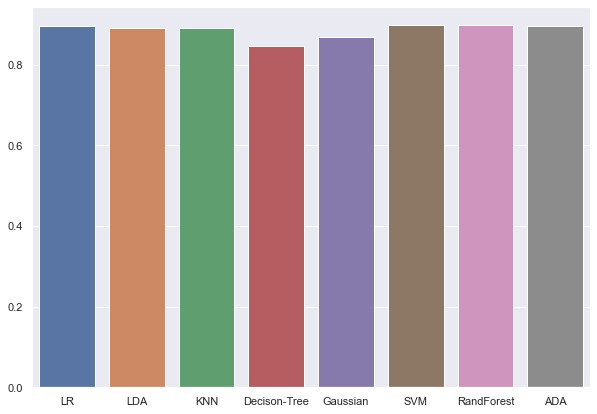

In [71]:
sns.set(rc={'figure.figsize':(10,7)})
sns.barplot(names,mean)

# CONCLUSION :

### According to ROC AUC score, Random Forest classifier works well than other algorithms in undersampled data and in k-fold cross validation(around 89-90%).And the KNN works better than other algorithm when data is oversampled.